In [2]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../16-swyft_unet/scripts/')
from plot import *
imkwargs = dict(extent=(-2.5, 2.5, -2.5, 2.5), origin='lower') #left, right, bottom, top

DEVICE = device= 'cuda:0'

In [18]:
from lensx.pyrofit_lensing_models import Blobs, DensityTranslator

In [3]:
n_sub = 5
n_mc = 3
L = n_pix = 40

grid_low = torch.tensor((10., -2.5, -2.5))
grid_high = torch.tensor((11., 2.5, 2.5))
grid_len = torch.tensor((n_mc, n_pix, n_pix))

In [19]:
densitytranslator = DensityTranslator(grid_low, grid_high, grid_len)

In [63]:
a, b = [], []
for _ in range(1000):
    posterior = torch.rand((3, 40, 40), device = DEVICE)
    posterior /= posterior.sum()
    a.append(len(densitytranslator(posterior)))
    b.append(posterior.sum().item())

In [55]:
len(densitytranslator(posterior)), posterior.sum().item()

(2421, 2388.78759765625)

In [3]:
sub_low_init  = np.array([[10.0, -2.5, -2.5], [10.0, -2.5, -2.5], [10.0, -2.5, -2.5]])
sub_high_init = np.array([[11.0, 2.5, 2.5],   [11.0, 2.5, 2.5],   [11.0, 2.5, 2.5]  ])

In [7]:
sub_low_init.size

9

In [10]:
np.random.uniform(low = sub_low_init, high = sub_high_init)#, size = (2, sub_low_init.size))

array([[10.53461932, -0.31260711,  0.47545328],
       [10.90772134, -1.259684  ,  2.31835972],
       [10.16864863,  0.1539035 ,  1.7737453 ]])

In [45]:
len(sample)

1516

In [35]:
sample = densitytranslator(posterior)
torch.randperm(len(sample))

tensor([ 642,  160,  382,  ...,  274, 1444, 1057])

In [4]:
blobs = Blobs(n_pix, n_mc, grid_low, grid_high)

In [5]:
prior = n_sub / torch.prod(grid_len)
density = torch.full(tuple(grid_len), prior, device = DEVICE)
# density = dict(density = density)

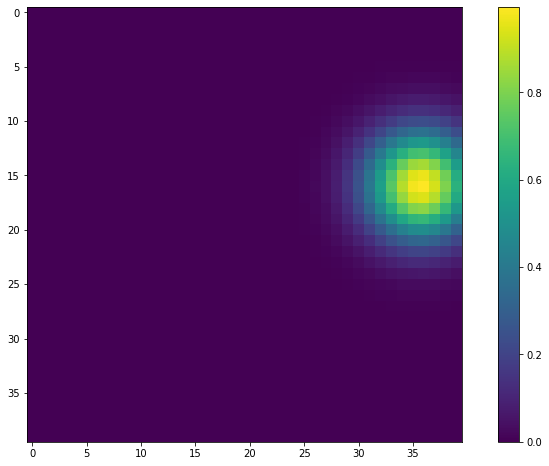

In [75]:
posterior = torch.rand((3, 40, 40), device = DEVICE)
posterior /= posterior.sum()

mu = blobs(posterior)
plt_imshow( mu.unsqueeze(0).cpu() , cbar = True)

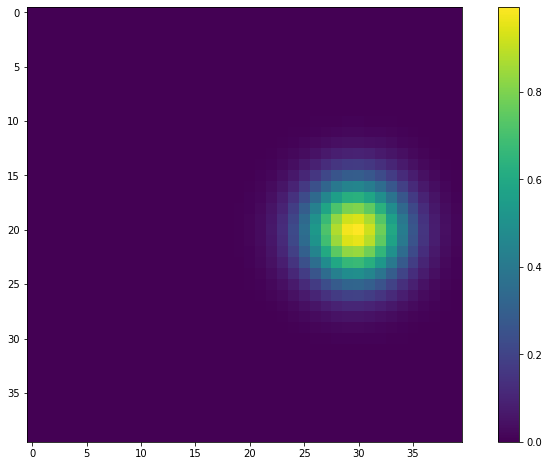

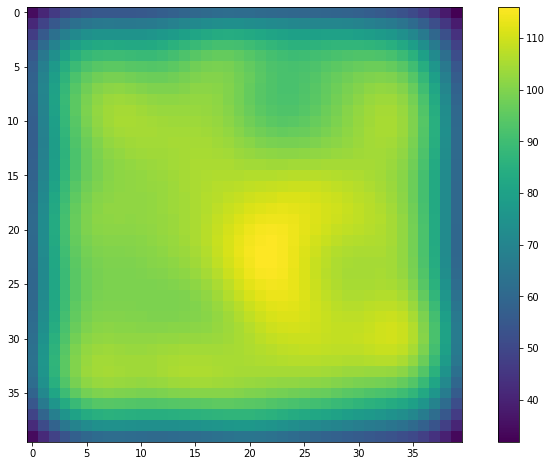

In [2]:
grid_low = torch.tensor((0., 0, 100.))
grid_high = torch.tensor((3., 40, 300.))
grid_n = torch.tensor((3, 4, 2))
N_coord = torch.prod(grid_n).item()
N_coord

24

In [3]:
from lensx.pyrofit_lensing_models import DensityTranslator

In [4]:
coordinates = DensityTranslator(grid_low, grid_high, grid_n)

In [5]:
density = torch.full(tuple(grid_n), 0.4, device = DEVICE)

In [6]:
random_drawn, m = coordinates(density)

In [34]:
histlist = []
for _ in range(100000):
    histlist.append( len(coordinates(density))/N_coord )

(array([6.2000e+01, 1.2470e+03, 2.5290e+03, 2.9065e+04, 3.2287e+04,
        1.3547e+04, 1.5968e+04, 5.0830e+03, 2.0300e+02, 9.0000e+00]),
 array([0.        , 0.08333333, 0.16666667, 0.25      , 0.33333333,
        0.41666667, 0.5       , 0.58333333, 0.66666667, 0.75      ,
        0.83333333]),
 <BarContainer object of 10 artists>)

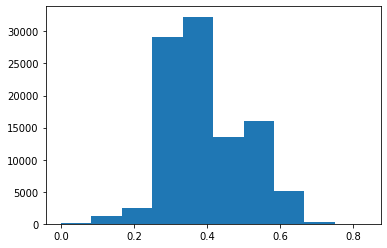

In [35]:
plt.hist(histlist)

In [58]:
x, y, z = coordinates.mesh

In [59]:
(density > random_drawn).sum()

tensor(8, device='cuda:0')

In [68]:
i, j, k = 0, 0, 0
x[i,j,k], y[i,j,k], z[i,j,k]

(tensor(0., device='cuda:0'),
 tensor(0., device='cuda:0'),
 tensor(100., device='cuda:0'))

In [66]:
m.sample().cpu().numpy()

array([[  0.38518372,   3.9051962 , 192.0364    ],
       [  0.7745679 ,  17.82059   , 216.80043   ],
       [  0.97674024,  33.405937  , 150.40593   ],
       [  1.8379338 ,  10.32459   , 227.50092   ],
       [  1.8304608 ,  21.016644  , 271.2259    ],
       [  2.3057303 ,   2.047724  , 134.40288   ],
       [  2.5865135 ,  22.852888  , 116.83558   ],
       [  2.8247766 ,  37.350594  , 190.85191   ]], dtype=float32)

In [69]:
linspaces

[tensor([0., 1., 2., 3.], device='cuda:0'),
 tensor([ 0., 10., 20., 30., 40.], device='cuda:0'),
 tensor([100., 200., 300.], device='cuda:0')]

In [63]:
linspaces = [torch.linspace(start = low, end = high, steps = n+1, device = device) 
             for low, high, n in zip(grid_low, grid_high, grid_n)]
mesh_ij = torch.meshgrid(*linspaces, indexing = 'ij')
mesh = torch.stack(mesh_ij)[:,:-1,:-1,:-1]
print(mesh.shape)

torch.Size([3, 3, 4, 2])


In [8]:
density = torch.full(tuple(grid_n), 0.4, device = DEVICE)
print(density.shape)
density

torch.Size([3, 4, 2])


tensor([[[0.4000, 0.4000],
         [0.4000, 0.4000],
         [0.4000, 0.4000],
         [0.4000, 0.4000]],

        [[0.4000, 0.4000],
         [0.4000, 0.4000],
         [0.4000, 0.4000],
         [0.4000, 0.4000]],

        [[0.4000, 0.4000],
         [0.4000, 0.4000],
         [0.4000, 0.4000],
         [0.4000, 0.4000]]], device='cuda:0')

In [7]:
density = torch.full(tuple(grid_n), 0.4, device = DEVICE)
density

tensor([[[0.4000, 0.4000],
         [0.4000, 0.4000],
         [0.4000, 0.4000],
         [0.4000, 0.4000]],

        [[0.4000, 0.4000],
         [0.4000, 0.4000],
         [0.4000, 0.4000],
         [0.4000, 0.4000]],

        [[0.4000, 0.4000],
         [0.4000, 0.4000],
         [0.4000, 0.4000],
         [0.4000, 0.4000]]], device='cuda:0')

In [8]:
coordinates(density)

torch.Size([3, 4, 2])


ValueError: too many values to unpack (expected 2)

tensor([[[0.4000, 0.4000],
         [0.4000, 0.4000],
         [0.4000, 0.4000],
         [0.4000, 0.4000]],

        [[0.4000, 0.4000],
         [0.4000, 0.4000],
         [0.4000, 0.4000],
         [0.4000, 0.4000]],

        [[0.4000, 0.4000],
         [0.4000, 0.4000],
         [0.4000, 0.4000],
         [0.4000, 0.4000]]], device='cuda:0')

In [11]:
random_drawn = torch.rand(size = density.shape, device = DEVICE)
random_drawn

tensor([[[0.1368, 0.3621],
         [0.9342, 0.4952],
         [0.7387, 0.8696],
         [0.9084, 0.7358]],

        [[0.1312, 0.6129],
         [0.6261, 0.0529],
         [0.9831, 0.8576],
         [0.7060, 0.4439]],

        [[0.3688, 0.0161],
         [0.8980, 0.5544],
         [0.4502, 0.9553],
         [0.4404, 0.1994]]], device='cuda:0')

In [12]:
drawn_target = density > random_drawn
drawn_target_repeated = torch.tile(drawn_target, (3,1,1,1))
drawn_target

tensor([[[ True,  True],
         [False, False],
         [False, False],
         [False, False]],

        [[ True, False],
         [False,  True],
         [False, False],
         [False, False]],

        [[ True,  True],
         [False, False],
         [False, False],
         [False,  True]]], device='cuda:0')

In [30]:
edges_high[drawn_target_repeated].view(3, -1).T

tensor([[  1.,  10., 150.],
        [  1.,  10., 200.],
        [  2.,  10., 150.],
        [  2.,  20., 200.],
        [  3.,  10., 150.],
        [  3.,  10., 200.],
        [  3.,  40., 200.]], device='cuda:0')

In [29]:
edges_low[drawn_target_repeated].view(3, -1).T

tensor([[  0.,   0., 100.],
        [  0.,   0., 150.],
        [  1.,   0., 100.],
        [  1.,  10., 150.],
        [  2.,   0., 100.],
        [  2.,   0., 150.],
        [  2.,  30., 150.]], device='cuda:0')

In [17]:
drawn_target_repeated.shape, edges_low.shape

(torch.Size([3, 3, 4, 2]), torch.Size([3, 3, 4, 2]))

In [12]:
drawn_target.shape

torch.Size([3, 4, 2])

In [213]:
mesh_xy = torch.meshgrid(*linspaces, indexing = 'xy')

In [15]:
linspaces = [torch.linspace(start = low, end = high, steps = n+1, device = device) 
                     for low, high, n in zip(grid_low, grid_high, grid_n)]
mesh_ij = torch.meshgrid(*linspaces, indexing = 'ij')

In [16]:
edges_low = torch.stack(mesh_ij)[:,:-1,:-1,:-1]
edges_high = torch.stack(mesh_ij)[:,1:,1:,1:]

In [244]:
density.shape

torch.Size([3, 4, 2])

In [247]:
grid_n

array([3, 4, 2])

In [249]:
bounds_low  = edges_low[drawn_target_repeated].view(grid_n)
# bounds_high = edges_high[drawn_target_repeated].view(*density.shape)

TypeError: view() received an invalid combination of arguments - got (numpy.ndarray), but expected one of:
 * (tuple of ints size)
      didn't match because some of the arguments have invalid types: (!numpy.ndarray!)
 * (torch.dtype dtype)
      didn't match because some of the arguments have invalid types: (!numpy.ndarray!)


In [181]:
mesh_ij = torch.meshgrid(*linspaces, indexing = 'ij')

edges_x_low, edges_y_low  =  torch.stack(mesh_ij)[:,:-1,:-1]
edges_x_high, edges_y_high  =  torch.stack(mesh_ij)[:,1:,1:]

bounds_low = torch.stack((edges_x_low[drawn_target], edges_y_low[drawn_target])).T
bounds_high = torch.stack((edges_x_high[drawn_target], edges_y_high[drawn_target])).T

IndexError: too many indices for tensor of dimension 2

In [175]:
bounds_low = torch.stack((edges_x_low[drawn_target], edges_y_low[drawn_target])).T
bounds_high = torch.stack((edges_x_high[drawn_target], edges_y_high[drawn_target])).T

In [242]:
m = torch.distributions.uniform.Uniform(low=bounds_low, high=bounds_high)
m.sample()

tensor([[[5.1280e-01, 5.6454e-01],
         [4.4578e-02, 1.5483e+00],
         [1.6027e+00, 1.8317e+00],
         [2.3243e+00, 2.4958e+00]],

        [[1.1809e+01, 3.9471e+01],
         [3.9568e+01, 1.6617e+01],
         [2.1833e+01, 3.5004e+01],
         [1.1073e+01, 3.4729e+01]],

        [[1.6606e+02, 1.2378e+02],
         [1.9388e+02, 1.4065e+02],
         [1.1358e+02, 1.6946e+02],
         [1.4800e+02, 1.6306e+02]]], device='cuda:0')

In [ ]:
torch.rand

In [141]:
bounds_x

tensor([[-4., -4., -3., -3., -3., -2.],
        [-3., -3., -2., -2., -2., -1.]], device='cuda:0')

In [123]:
edges_x_low, edges_y_low = torch.stack(mesh_ij)[:,:-1,:-1]

In [128]:
edges_x_low[drawn_target]

tensor([-4., -4., -3., -3., -3., -2.], device='cuda:0')

In [126]:
drawn_target

tensor([[False, False,  True,  True],
        [ True,  True, False,  True],
        [False, False,  True, False]], device='cuda:0')

In [127]:
edges_x_low

tensor([[-4., -4., -4., -4.],
        [-3., -3., -3., -3.],
        [-2., -2., -2., -2.]], device='cuda:0')

In [121]:
torch.stack(mesh_ij)[:,:-1,:-1]

tensor([[[-4., -4., -4., -4.],
         [-3., -3., -3., -3.],
         [-2., -2., -2., -2.]],

        [[ 6.,  7.,  8.,  9.],
         [ 6.,  7.,  8.,  9.],
         [ 6.,  7.,  8.,  9.]]], device='cuda:0')

In [116]:
edges_x_low

tensor([-1., -1., -1., -1.], device='cuda:0')

In [118]:
torch.stack(mesh_ij)[:,:-1,:-1]

tensor([[[-4., -4., -4., -4.],
         [-3., -3., -3., -3.],
         [-2., -2., -2., -2.]],

        [[ 6.,  7.,  8.,  9.],
         [ 6.,  7.,  8.,  9.],
         [ 6.,  7.,  8.,  9.]]], device='cuda:0')

In [ ]:
drawn_target

In [107]:
torch.stack(mesh_ij)[:,:,:-1] == torch.stack(mesh_ij)[...,:-1]

tensor([[[True, True, True, True],
         [True, True, True, True],
         [True, True, True, True],
         [True, True, True, True]],

        [[True, True, True, True],
         [True, True, True, True],
         [True, True, True, True],
         [True, True, True, True]]], device='cuda:0')

In [101]:
torch.stack(mesh_ij)[:,:,:-1]

tensor([[[-4., -4., -4., -4.],
         [-3., -3., -3., -3.],
         [-2., -2., -2., -2.],
         [-1., -1., -1., -1.]],

        [[ 6.,  7.,  8.,  9.],
         [ 6.,  7.,  8.,  9.],
         [ 6.,  7.,  8.,  9.],
         [ 6.,  7.,  8.,  9.]]], device='cuda:0')

In [98]:
meshgrid = torch.meshgrid(*linspaces, indexing = 'xy')

In [99]:
mesh_xy = torch.meshgrid(*linspaces, indexing = 'xy')
mesh_xy

(tensor([[-4., -3., -2., -1.],
         [-4., -3., -2., -1.],
         [-4., -3., -2., -1.],
         [-4., -3., -2., -1.],
         [-4., -3., -2., -1.]], device='cuda:0'),
 tensor([[ 6.,  6.,  6.,  6.],
         [ 7.,  7.,  7.,  7.],
         [ 8.,  8.,  8.,  8.],
         [ 9.,  9.,  9.,  9.],
         [10., 10., 10., 10.]], device='cuda:0'))

In [100]:
mesh_ij = torch.meshgrid(*linspaces, indexing = 'ij')
mesh_ij

(tensor([[-4., -4., -4., -4., -4.],
         [-3., -3., -3., -3., -3.],
         [-2., -2., -2., -2., -2.],
         [-1., -1., -1., -1., -1.]], device='cuda:0'),
 tensor([[ 6.,  7.,  8.,  9., 10.],
         [ 6.,  7.,  8.,  9., 10.],
         [ 6.,  7.,  8.,  9., 10.],
         [ 6.,  7.,  8.,  9., 10.]], device='cuda:0'))

In [ ]:
linspaces = []
for low, high, n in zip(grid_low, grid_high, grid_n):
    linspaces.append()

In [17]:
np.linspace((0,0), (3, 4), 3, axis = 1)

TypeError: linspace(): argument 'start' (position 1) must be Number, not tuple

In [28]:
np.linspace(grid_low, grid_high, grid_n, axis = 1)

TypeError: 'tuple' object cannot be interpreted as an integer